In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
import pandas as pd
import numpy as np

In [141]:
df = pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [142]:
df.drop(columns = 'PassengerId', axis = 1, inplace = True)
df.drop(columns = 'Pclass', axis = 1, inplace = True)
df.drop(columns = 'SibSp', axis = 1, inplace = True)
df.drop(columns = 'Parch', axis = 1, inplace = True)
df.drop(columns = 'Ticket', axis = 1, inplace = True)
df.drop(columns = 'Name', axis = 1, inplace = True)
df.drop(columns = 'Fare', axis = 1, inplace = True)
df.drop(columns = 'Embarked', axis = 1, inplace = True)
df.drop(columns = 'Cabin', axis = 1, inplace = True)
df

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0
...,...,...,...
886,0,male,27.0
887,1,female,19.0
888,0,female,NaN
889,1,male,26.0


In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
df_clean = df.copy()
label_encoder = LabelEncoder()
df_clean['Sex'] = label_encoder.fit_transform(df['Sex'])
df_clean['Age'] = label_encoder.fit_transform(df['Age'])
df_clean

,Survived,Sex,Age
0,0,1,28
1,1,0,51
2,1,0,34
3,1,0,47
4,0,1,47
...,...,...,...
886,0,1,35
887,1,0,24
888,0,0,88
889,1,1,34


In [145]:
cols = df.columns.to_list()[-2:]
cols

['Sex', 'Age']

In [146]:
features = df_clean[cols]
response = df_clean['Survived']

In [147]:
from sqlalchemy.sql.functions import random
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.3, random_state = 0)

In [148]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(random_state=0)

In [149]:
predictions = classifier.predict(features_test)
table = pd.DataFrame({'actual': response_test, 'predict': predictions})
table

,actual,predict
495,0,0
648,0,0
278,0,1
31,1,1
255,1,1
...,...,...
263,0,0
718,0,0
620,0,0
786,1,1


In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(response_test, predictions)

0.7611940298507462

In [156]:
from sklearn.metrics import confusion_matrix
idx = ['actual 0', 'actual 1']
cm = pd.DataFrame(confusion_matrix(response_test, predictions),
                  columns = ['pred 0', 'pred 1'],
                  index = idx)
cm

,pred 0,pred 1
actual 0,136,32
actual 1,32,68


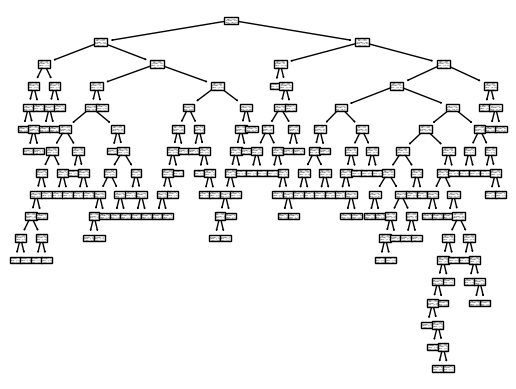

In [159]:
from sklearn.tree import plot_tree
decision_tree_plot = plot_tree(classifier, feature_names = cols, class_names = True)

In [160]:
importance = pd.DataFrame({'features':cols, 'importance': classifier.feature_importances_})
importance

,features,importance
0,Sex,0.600798
1,Age,0.399202


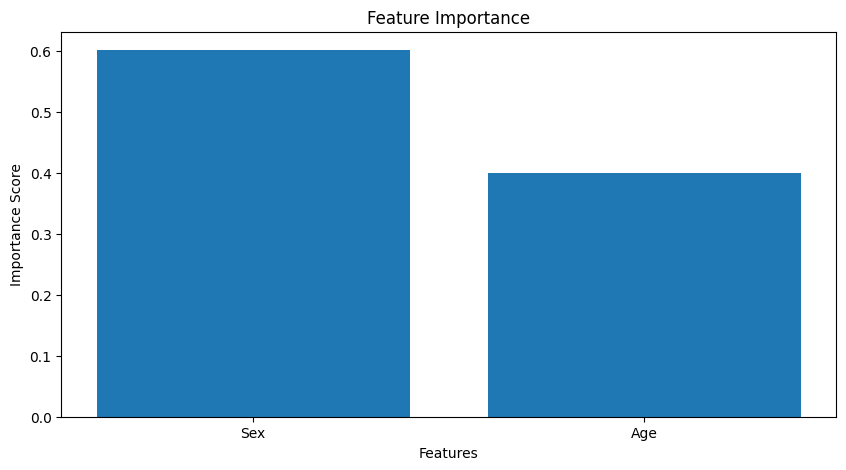

In [163]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(x = cols, height = classifier.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [189]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import numpy as np

def grid_search(X, y, kfolds):
  param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange (3,15)}
  dtree_model = DecisionTreeClassifier()
  dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = kfolds)
  dtree_gscv.fit(X,y)
  return dtree_gscv.best_params_

grid_search(X = features_train, y = response_train, kfolds = 3)

{'criterion': 'entropy', 'max_depth': 4}

In [190]:
classifier_cv = DecisionTreeClassifier(criterion ='gini', max_depth = 3)
classifier_cv.fit(features_train, response_train)

DecisionTreeClassifier(max_depth=3)

In [191]:
predictions_cv = classifier_cv.predict(features_test)
summary = pd.DataFrame({'actual': response_test, 'decision tree': predictions, 'decision tree cv': predictions_cv})
summary

,actual,decision tree,decision tree cv
495,0,0,0
648,0,0,0
278,0,1,0
31,1,1,1
255,1,1,1
...,...,...,...
263,0,0,0
718,0,0,0
620,0,0,0
786,1,1,1
